In [33]:
%matplotlib inline
### import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#An overview of the columns in the dataset

Pregnancies:  Number of times pregnant
    
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    
BloodPressure: Diastolic blood pressure (mm Hg)
    
SkinThickness: Triceps skin fold thickness (mm)
       
Insulin: 2-Hour serum insulin (mu U/ml)
    
BMI: Body mass index (weight in kg/(height in m)^2)
    
DiabetesPedigreeFunction: Diabetes pedigree function
    
Age: Age (years)
    
Cabin : Cabin Number
    
Outcome: Class variable (0 or 1)


In [4]:
#Printing out some information about the data
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    
    print("-----------Information-----------")
    print(data.info())
    
    print("-----------Data Types-----------")
    print(data.dtypes)
    
    print("----------Missing value-----------")
    print(data.isnull().sum())
    
    print("----------Null value-----------")
    print(data.isna().sum())
    
    print("----------Shape of Data----------")
    print(data.shape)
eda(data)

----------Top-5- Record----------
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness         

As we can see, there are no missing and null values in our dataset.

In [5]:
Positive = data[data['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [6]:
#Lets have a look at the statistical info about our data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Based on the understanding of the parameters, it seems highly unlikely that glucose, bloodpressure, skinthickness, insulin and bmi levels are 0. I will hence replace the 0 values with the mean of each parameter.

In [7]:
# replace the 0 values of the impacted columns with the mean values

cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in cols:
   data[i].replace(0,data[i].mean(),inplace=True)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


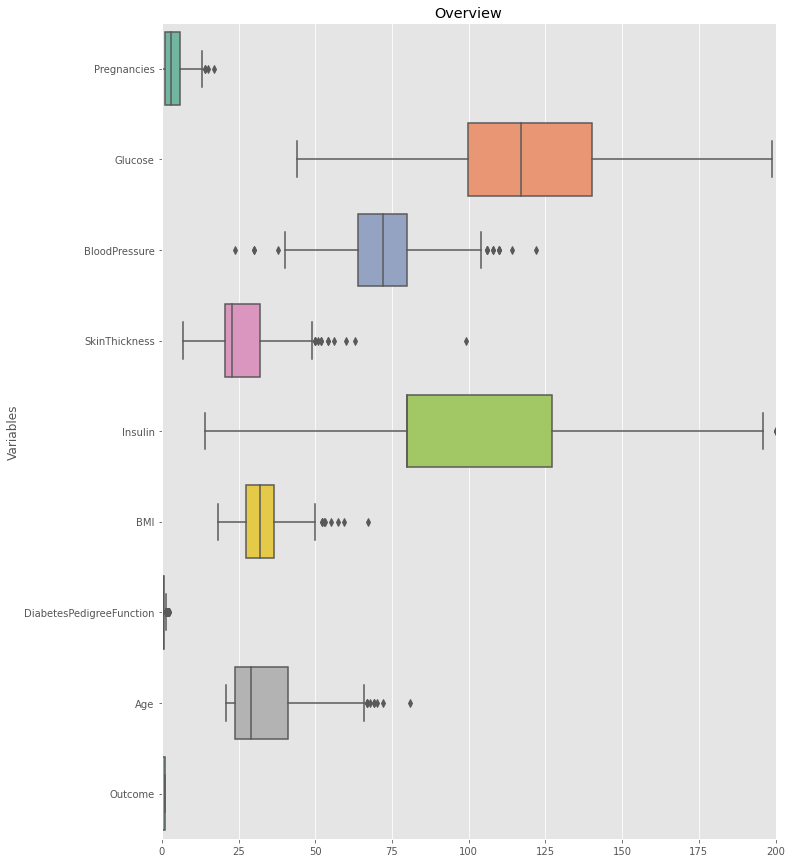

In [8]:
#Let's try to get an idea about the outliers in our dataset
plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(11, 15))
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2',)

We can clearly see outliers are present in the data. So now we wil remove the outliers...

In [ ]:
def Remove_Outlier (col):
    Q1,Q3 = np.percentile (col,[25,75])
    
    IQR= Q3-Q1
    
    upper_range =  Q3+(IQR*1.5)
    
    lower_range =  Q1-(IQR*1.5)
    
    return upper_range,lower_range
for i in data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]:
    ur,lr = Remove_Outlier(data[i])
    data[i]= np.where(data[i]>ur,ur,data[i])
    data[i]= np.where(data[i]<lr,lr,data[i])

Column names except for the target column are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

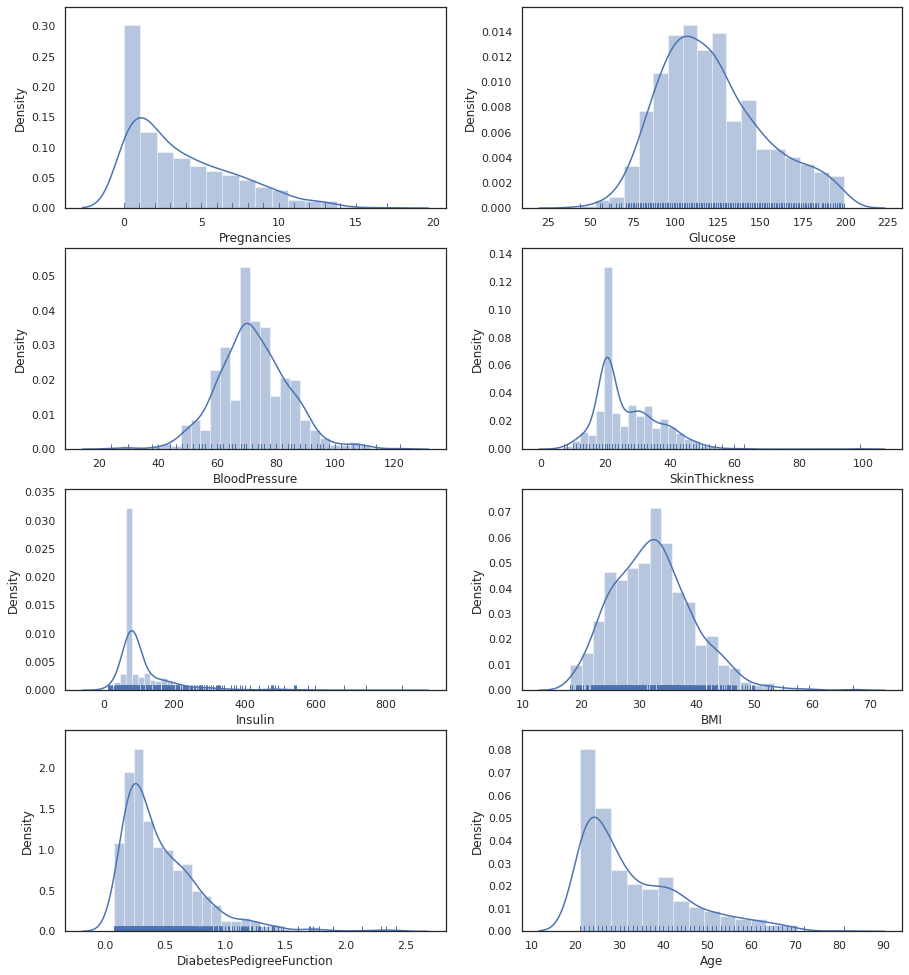

In [9]:
##Let's have a look at the distribution of the data
# Add all column names to a list except for the target variable (outcome)
columns=data.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(data[columns[i]], hist=True, rug=True)

The plots show that Glucose, Blood Pressure, BMI are normally distributed.Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.

In [10]:
#Let's look at how number of pregnancies affect the chances if being Diabetic
#Pregnencies vs Outcome
fig = px.histogram(data, x = data['Pregnancies'], color = 'Outcome')
fig.show()
fig2 = px.box(data, x = data['Pregnancies'], color = 'Outcome')
fig2.show()

Looking at both plots we can seee that higher the number of pragnancies, more is the risks of diabetes

---

# **`bold text`**

Let's look at how glucose levels affect the chances if being Diabetic

In [11]:
#Glucose vs Outcome
fig = px.histogram(data, x = data['Glucose'], color = 'Outcome')
fig.show()
fig2 = px.box(data, x = data['Glucose'], color = 'Outcome')
fig2.show()

Higher Glucose level leads to more chances of Diabetes!**bold text**


<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how blood pressure affect the chances if being Diabetic</p>

In [12]:
#BloodPressure vs Outcome
fig = px.histogram(data, x = data['BloodPressure'], color = 'Outcome')
fig.show()
fig2 = px.box(data, x = data['BloodPressure'], color = 'Outcome')
fig2.show()

### we can seee that the probabilty of diabetes is higher when Blood pressure is high.



<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how the SkinThickness affect the chances if being Diabetic</p>

In [13]:
#SkinThickness vs Outcome
fig = px.histogram(data, x = data['SkinThickness'], color = 'Outcome')
fig.show()
fig2 = px.box(data, x = data['SkinThickness'], color = 'Outcome')
fig2.show()

- This feature needs further analysis


<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how the Insulin level affect the chances if being Diabetic</p>

In [14]:
#Insulin vs Outcome
fig = px.histogram(data, x = data['Insulin'], color = 'Outcome')
fig.show()
fig2 = px.box(data, x = data['Insulin'], color = 'Outcome')
fig2.show()

  ### that higher the Insulin level more the chances of diabetes.¶


<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how the BMI affect the chances if being Diabetic</p>

In [15]:
#BMI vs Outcome
fig = px.histogram(data, x = data['BMI'], color = 'Outcome')
fig.show()
fig2 = px.box(data, x = data['BMI'], color = 'Outcome')
fig2.show()

 ### We observe that higher the BMI more the chances of diabetes.


<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how DiabetesPedigreeFunction affect the chances if being Diabetic</p>

In [16]:
# DiabetesPedigreeFunction andd Outcome
fig = px.histogram(data, x = data['DiabetesPedigreeFunction'], color = 'Outcome')
fig.show()
fig2 = px.box(data, x = data['DiabetesPedigreeFunction'], color = 'Outcome')
fig2.show()

 ### We observe that diabetic people have higher DiabetesPedigreeFunction value i,e genetic influence plays some role in the Diabetes among patients.




<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how Age affect the chances if being Diabetic</p>

In [17]:
# Age andd Outcome
fig = px.histogram(data, x = data['Age'], color = 'Outcome')
fig.show()
fig2 = px.box(data, x = data['Age'], color = 'Outcome')
fig2.show()

 ### we observe that there is less chance of diabetes among young people and more chances for the people above the Age of years
---


<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Scaling the Data</p>


In [18]:
from sklearn.preprocessing import StandardScaler
# scaler
scaler = StandardScaler()
norm = scaler.fit_transform(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
df_norm = pd.DataFrame({'Pregnancies': norm[ :, 0], 'Glucose' : norm[ :, 1], 'BloodPressure' : norm[ :, 2], 'SkinThickness' : norm[ :, 3],
                       'Insulin' : norm[ :, 4], 'BMI' : norm[ :, 5], 'DiabetesPedigreeFunction' : norm[ :, 5], 'Age' : norm[ :, 6]}, 
                       columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
df_norm['Outcome'] = data['Outcome']



<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Splitting the Data into training and testing sets</p>

In [22]:
# split
x = df_norm.drop(['Outcome'], axis=1)
y = df_norm['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Oversampling the data using SMOTE to deal with imbalance in dataset</p>


In [23]:
# over sampling
os = SMOTE(random_state=42)
columns = x_train.columns
os_data_x,os_data_y = os.fit_resample(x_train, y_train.ravel())

---

<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Modelling</p>


In [24]:
# logistic regression
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']} 
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5) #Tuning the hyper-parameters
log_model.fit(os_data_x, os_data_y)
log_predict = log_model.predict(x_test)
log_score = log_model.best_score_

In [25]:
# knn
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5) #Tuning the hyper-parameters
knn_model.fit(os_data_x, os_data_y)
knn_predict = knn_model.predict(x_test)
knn_score = knn_model.best_score_

In [26]:
# svc
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5) #Tuning the hyper-parameters
svc_model.fit(os_data_x, os_data_y)
svc_predict = svc_model.predict(x_test)
svc_score = svc_model.best_score_


In [27]:
# decsion tree
dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5) #Tuning the hyper-parameters
dt_model.fit(os_data_x, os_data_y)
dt_predict = dt_model.predict(x_test)
dt_score = dt_model.best_score_

In [28]:
# random forest
rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 26, 5)),
             'max_depth': list(range(3, 20, 2))}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5) #Tuning the hyper-parameters
rf_model.fit(os_data_x, os_data_y)
rf_predict = rf_model.predict(x_test)
rf_score = rf_model.best_score_

---


<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Evaluation</p>


                    Model     Score
4  RandomForestClassifier  0.833936
1    KNeighborsClassifier  0.822425
2                     SVC  0.783710
3  DecisionTreeClassifier  0.782467
0      LogisticRegression  0.773649


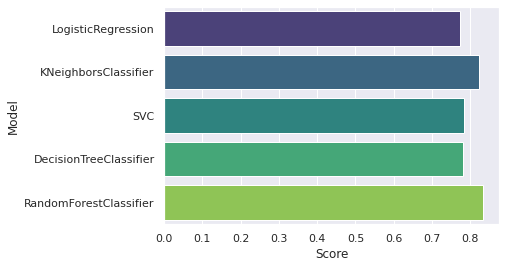

In [31]:
models = ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 
          'RandomForestClassifier']
scores = [log_score, knn_score, svc_score, dt_score, rf_score]
score_table = pd.DataFrame({'Model':models, 'Score':scores})
score_table.sort_values(by='Score', axis=0, ascending=False)
print(score_table.sort_values(by='Score', ascending=False))
sns.barplot(x = score_table['Score'], y = score_table['Model'], palette='viridis');



<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">We can see that RandomForest classifier is the Best performing model with a score of .8339</p>

In [32]:
#Printing classification report for randomforest claassifier
from sklearn import metrics
print('Classification Report_test','\n',metrics.classification_report(y_test, rf_predict))

Classification Report_test 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       151
           1       0.60      0.69      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231




---

<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Thank You!</p>
